In [3]:
import pandas as pd
datafile = "PlantGrowth.csv"
data = pd.read_csv(datafile, index_col=0)

In [4]:
data.head()

weight group
1    4.17  ctrl
2    5.58  ctrl
3    5.18  ctrl
4    6.11  ctrl
5    4.50  ctrl

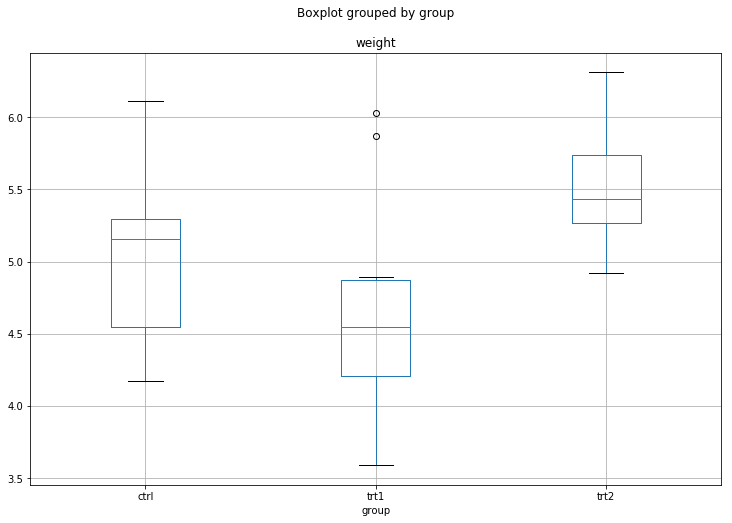

In [7]:
#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))

In [9]:
ctrl = data['weight'][data.group == 'ctrl']

In [10]:
ctrl

1     4.17
2     5.58
3     5.18
4     6.11
5     4.50
6     4.61
7     5.17
8     4.53
9     5.33
10    5.14
Name: weight, dtype: float64

In [11]:
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

In [12]:
k = len(pd.unique(data.group))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('group').size()[0] # Participants in each condition

In [13]:
k, N, n

(3, 30, 10)

In [14]:
from scipy import stats

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

In [15]:
F, p

(4.846087862380136, 0.0159099583256229)

In [16]:
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

In [17]:
DFbetween, DFwithin, DFtotal

(2, 27, 29)

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [23]:
pair_t = mod.t_test_pairwise('group')
pair_t.result_frame

coef   std err         t     P>|t|  Conf. Int. Low  \
trt1-ctrl -0.371  0.278782 -1.330791  0.194388       -0.943013   
trt2-ctrl  0.494  0.278782  1.771996  0.087682       -0.078013   
trt2-trt1  0.865  0.278782  3.102787  0.004459        0.292987   

           Conf. Int. Upp.  pvalue-hs  reject-hs  
trt1-ctrl         0.201013   0.194388      False  
trt2-ctrl         1.066013   0.167675      False  
trt2-trt1         1.437013   0.013318       True